<a href="https://colab.research.google.com/github/cJagno/Insurance_Predictions/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [266]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [267]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [268]:
df = pd.read_csv('/content/drive/MyDrive/PT_Data_Science/PandasForDataManipulation/insurance.csv')
cf = pd.read_csv('/content/drive/MyDrive/PT_Data_Science/PandasForDataManipulation/insurance.csv')

In [269]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [271]:
cf['region'] = cf['region'].map({'southeast': 1,
                                   'southwest': 2,
                                   'northwest': 3,
                                   'northeast': 4})

In [272]:
cf['sex'] = cf['sex'].map({'female': 1,
                           'male': 2})

In [273]:
cf['smoker'] = cf['smoker'].map({'yes': 1,
                                 'no': 0})

In [274]:
df['smoker'] = df['smoker'].astype('bool')

In [275]:
corr = cf.corr()

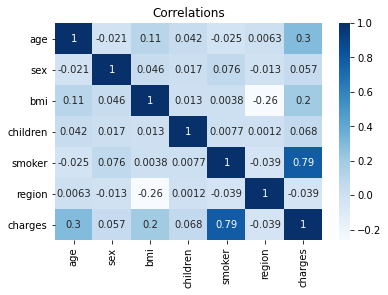

In [276]:
sns.heatmap(corr, cmap='Blues', annot=True)
plt.title('Correlations');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Average Charges per Region')

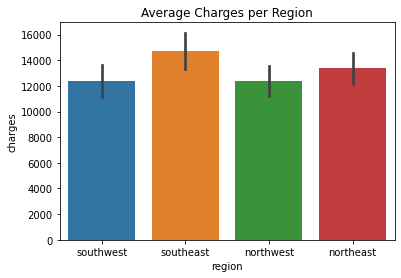

In [277]:
sns.barplot(df['region'], df['charges'])
plt.title('Average Charges per Region')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Average Charges per Sex')

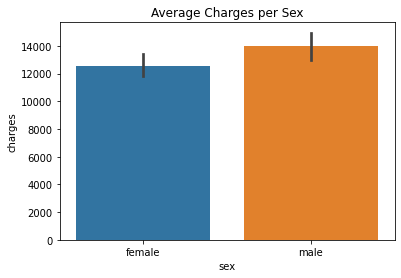

In [278]:
sns.barplot(df['sex'], df['charges'])
plt.title('Average Charges per Sex')

In [279]:
southeast = df.loc[df['region']=='southeast',:]
northeast = df.loc[df['region']=='northeast',:]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


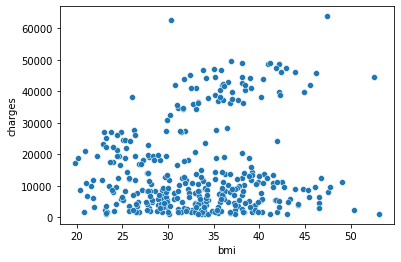

In [280]:
sns.scatterplot(southeast['bmi'], southeast['charges'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


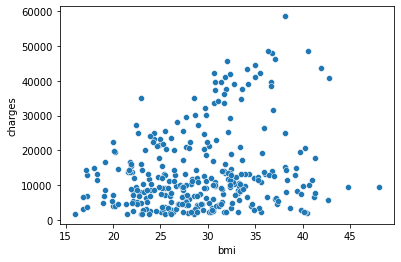

In [281]:
sns.scatterplot(northeast['bmi'], northeast['charges'])

In [282]:
one_df = pd.get_dummies(df, columns=['region',
                                     'sex',
                                     'smoker'], drop_first = True)

In [283]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [284]:
X = one_df.drop(columns='charges')
y = one_df['charges']

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [286]:
reg = LinearRegression()

In [287]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [288]:
train_preds = reg.predict(X_train)
test_preds = reg.predict(X_test)

In [289]:
print('Training Score:',reg.score(X_train, y_train))
print('Testing Score:',reg.score(X_test, y_test))

Training Score: 0.12195698613873451
Testing Score: 0.13770706182234194


In [290]:
rf = RandomForestRegressor(n_estimators = 275, max_depth= 5, min_samples_leaf=3,min_samples_split= 2, random_state= 42)

In [291]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=275, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [292]:
estimator_range = [1] + list(range(10, 300, 10))
scores = []
for estimator in estimator_range:
    rf = RandomForestRegressor(n_estimators=estimator,
                                 random_state=0)
    rf.fit(X_train, y_train)
    scores.append(rf.score(X_test, y_test))

Text(0, 0.5, 'score')

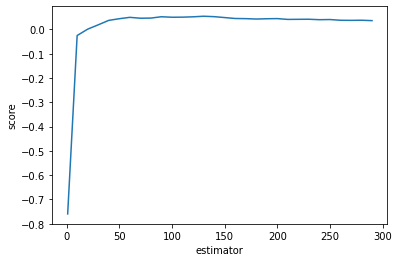

In [293]:
plt.plot(estimator_range, scores);
plt.xlabel('estimator')
plt.ylabel('score')

In [294]:
print('Training accuracy:', rf.score(X_train, y_train))
print('Testing accuracy:', rf.score(X_test, y_test))

Training accuracy: 0.8531248451825562
Testing accuracy: 0.03629542805878461


In [295]:
params = {'n_jobs': [-1, 1],
           'min_samples_split': [2, 4, 6],
           'min_samples_leaf': [1, 3],
          'max_depth': [None, 5]}

In [296]:
gs = GridSearchCV(rf, params)

In [297]:
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=290, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [298]:
gs.best_params_

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_jobs': 1}

In [299]:
gs.best_score_

0.06483622245846501

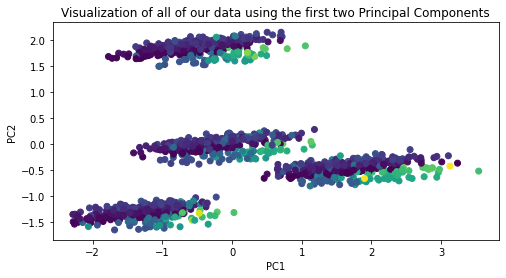

In [300]:
plt.figure(figsize = (8, 4))
plt.scatter(pcs[:,0], pcs[:,1], c = y)
plt.title('Visualization of all of our data using the first two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2');

In [341]:
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from sklearn.metrics import accuracy_score

In [363]:
input_shape = X_train.shape[1:6]
input_shape

(7,)

In [364]:
model = Sequential()

In [365]:
model.add(Dense(6, input_shape = input_shape))
model.add(Dense(3, activation='relu'))
model.add(Dense(1))

In [366]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [367]:
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs = 300)

Epoch 1/300
32/32 [==============================] - 1s 8ms/step - loss: 321108256.0000 - val_loss: 327157504.0000
Epoch 2/300
32/32 [==============================] - 0s 3ms/step - loss: 321072480.0000 - val_loss: 327108544.0000
Epoch 3/300
32/32 [==============================] - 0s 4ms/step - loss: 321008864.0000 - val_loss: 327022656.0000
Epoch 4/300
32/32 [==============================] - 0s 4ms/step - loss: 320901024.0000 - val_loss: 326885856.0000
Epoch 5/300
32/32 [==============================] - 0s 4ms/step - loss: 320732128.0000 - val_loss: 326672384.0000
Epoch 6/300
32/32 [==============================] - 0s 4ms/step - loss: 320479200.0000 - val_loss: 326359264.0000
Epoch 7/300
32/32 [==============================] - 0s 4ms/step - loss: 320114752.0000 - val_loss: 325939104.0000
Epoch 8/300
32/32 [==============================] - 0s 5ms/step - loss: 319633312.0000 - val_loss: 325366176.0000
Epoch 9/300
32/32 [==============================] - 0s 3ms/step - loss: 3190019

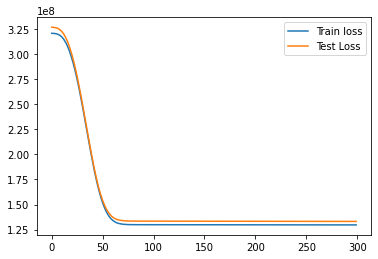

In [368]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();